In [3]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision',3)

df = pd.read_csv('data/ch2_scores_em.csv',index_col='生徒番号')


In [4]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df=pd.DataFrame({'英語':en_scores,
                       '数学':ma_scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='生徒'))
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [5]:
summary_df = scores_df.copy()
summary_df['英語の偏差']=summary_df['英語']-summary_df['英語'].mean()
summary_df['数学の偏差']=summary_df['数学']-summary_df['数学'].mean()
summary_df['偏差同士の積']=summary_df['英語の偏差']*summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [6]:
summary_df['偏差同士の積'].mean()

62.8

In [7]:
cov_mat = np.cov(en_scores,ma_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [8]:
cov_mat[0,1],cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

In [9]:
cov_mat[0,0],cov_mat[1,1]

(86.0, 68.44000000000001)

In [10]:
np.cov(en_scores,ma_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))

0.8185692341186713

In [11]:
np.corrcoef(en_scores,ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [12]:
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


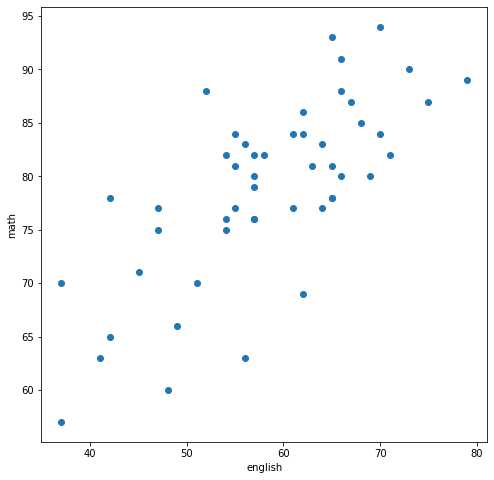

In [15]:
english_scores =np.array(df['英語'])
math_scores = np.array(df['数学'])

fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores,math_scores)
ax.set_xlabel('english')
ax.set_ylabel('math')

plt.show()

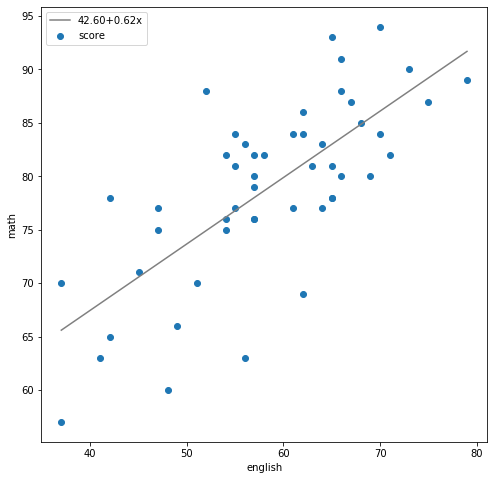

In [18]:
poly_fit = np.polyfit(english_scores,math_scores,1)

poly_1d = np.poly1d(poly_fit)

xs = np.linspace(english_scores.min(),english_scores.max())

ys = poly_1d(xs)

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.scatter(english_scores,math_scores,label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.legend(loc='upper left')
plt.show()

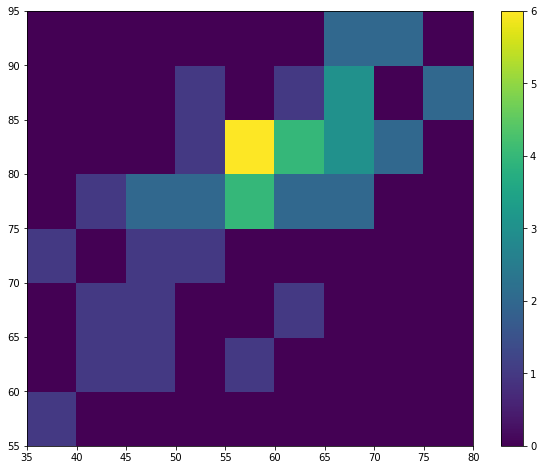

In [20]:
fig =plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c=ax.hist2d(english_scores, math_scores,bins=[9,8],range=[(35,80),(55,95)])
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax=ax)
plt.show()